# <font color=cyan><b>KC HOUSING PREDICTION MODEL.</b></font> 




<img src="https://cdn.tollbrothers.com/communities/14390/images-resized/Canopy_Cottages_NORTH_GREEN_STREETSCAPE_4140_WA-1_920.jpg"/>



## <font color=green><i>1. Business understanding</i></font> 

### 1.1 Introduction
King County is a vibrant community in Seattle, Washington, with residents from diverse backgrounds, representing countries from around the world. The real estate market in King County exhibits considerable variation in house prices due to multiple factors such as property features, location, and market trends. The complexity and dynamism of the market make it challenging to predict house prices accurately

    References: 
    'https://kingcounty.gov/en/legacy/audience/employees/careers', 





### 1.2 Business problem

The unpredictability of house prices poses a significant challenge for various stakeholders, including potential homebuyers and real estate agents. These stakeholders require accurate and reliable house price predictions to make informed decisions. Homebuyers need to understand market trends to make prudent purchasing decisions while the  real estate agents need accurate data to advise their clients effectively, 

### 1.3 Objectives

Our role as data scientists is to develop a  house price prediction model that meet the following objects-:

- Determine which features have the most significant impact on house prices.
- Build a predictive model to estimate house prices based on features.
- Examine the correlations between different features and house prices to identify strong relationships.
- Determine how house prices vary with reference to geographical location.



## <font color=green><i>2. Data understanding</i></font> 

To understand the dataset we are on, we first import necessary libraries and then load dataset to have a view of the few rows of the dataset.

### 2.1 Importing Libraries

In [5]:
#import libraries

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline


### 2.2 Loading the dataset

In [6]:
#Loading dataset
df = pd.read_csv(r"C:\Users\AHB\Desktop\phase2\CHECKPOINTS\dsc-phase-2-project\data\kc_house_data.csv")
df.sample(n=10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1105,2505500030,7/3/2014,1130000.0,4,2.50,3160,8281,2.0,0.0,0.0,...,9,3160,?,1995,NaN,98033,47.6699,-122.195,3000,8281
4662,2473410690,6/23/2014,324000.0,4,1.75,2110,7208,1.0,0.0,0.0,...,8,1170,940.0,1975,NaN,98058,47.4464,-122.129,1820,7208
13712,4249000230,8/29/2014,766000.0,3,2.50,2270,9822,2.0,0.0,0.0,...,9,2270,?,1988,0.0,98052,47.6685,-122.137,2790,8089
17273,1250201640,5/7/2014,775000.0,3,2.00,2540,7200,1.5,0.0,3.0,...,8,1600,940.0,1905,0.0,98144,47.5972,-122.292,2040,5900
3804,3530540090,11/13/2014,245000.0,2,1.50,1450,6258,1.0,NaN,0.0,...,8,1450,?,1983,0.0,98198,47.3785,-122.322,1460,5375
3568,2423059067,12/19/2014,770000.0,3,2.75,2070,54557,2.0,0.0,0.0,...,8,2070,0.0,1996,NaN,98058,47.4659,-122.116,2190,49658
16639,2895550190,8/8/2014,245000.0,4,2.50,1700,4268,2.0,0.0,0.0,...,7,1700,0.0,2000,0.0,98001,47.3303,-122.268,1700,4488
11893,241900060,6/26/2014,354000.0,4,2.50,2580,5476,2.0,0.0,0.0,...,8,2580,0.0,2005,NaN,98031,47.4042,-122.205,2900,5476
6174,1266200130,6/15/2014,650000.0,3,1.75,2140,9484,1.0,NaN,0.0,...,7,1290,850.0,1953,0.0,98004,47.6234,-122.191,1960,9630
8439,6600220150,3/10/2015,549950.0,4,2.50,2230,14694,1.0,0.0,0.0,...,7,1180,1050.0,1981,0.0,98074,47.6305,-122.034,1470,13458


### 2.3 Data description


The dataset provided contains house sale prices for King County, Washington, along with various features that describe each property. This dataset is well-suited for our objectives due to the diverse range of attributes it includes, which are essential for accurately predicting house prices.

 Each column in the dataset represents a specific feature that can influence the house price. Below is a description of each feature:
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors



### 2.3 Presenting the size of the dataset

In [8]:
print("No: of rows is", df.shape[0])
print('No: of  columns is ', df.shape[1])

No: of rows is 21597
No: of  columns is  21


### 2.4 Justification of feature inclusion



open for discussion

### 2.5 limitations of the data that have implications for the project

 - Accuracy - The data may not be 100% accurate as we do not have information of the processes that were used to collect the data.
 - Missing values on certain collumns
 - Potential of errors during data capture and entry.
  


## <font color=green><i>3. Data preparation</i></font> 


In [63]:
#viewing the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [64]:
#getting the statistical summary of the dataset
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [65]:
#detecting missing values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [66]:
df["waterfront"].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

The "waterfront" column appears to be binary, indicating whether a property is on the waterfront (1) or not (0).

 - There are 19,075 properties that are not on the waterfront (0.0).
 - There are 146 properties that are on the waterfront (1.0)


In [67]:
#converting the waterfront data from numeric to categorical data
df["waterfront"] = df["waterfront"].astype('category')

In [68]:
# Convert numerical waterfront data to categorical with labels
df["waterfront"] = pd.Categorical(df["waterfront"], categories=[0, 1], ordered=False)
df["waterfront"].cat.rename_categories({0: 'No', 1: 'Yes'}, inplace=True)

# # Verify the changes
print(df["waterfront"].value_counts())


No     19075
Yes      146
Name: waterfront, dtype: int64


In [69]:
#assessing the none missing values of the view column
df["view"].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [70]:
df["view"]=df["view"].fillna(5)


In [71]:
df.isna().sum()


id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [72]:
#converting the view column to categorical
df["view"] = df["view"].astype('category')


In [73]:
#Renaming the categories
df["view"] = df["view"].cat.set_categories([0, 1, 2, 3, 4, 5])
df["view"].cat.rename_categories({0: 'No view', 1: 'Poor view', 2: 'Average view', 3: 'Good view', 4: 'Excellent view',5: 'Unknown'}, inplace=True)

print(df["view"].value_counts())


No view           19422
Average view        957
Good view           508
Poor view           330
Excellent view      317
Unknown              63
Name: view, dtype: int64


In [74]:
#checkingfor duplicate values

df.duplicated().sum()

0

From the above output of of checking duplicate values, we can conclude that there are no duplicate values in the dataset provided.

### Determing features that have the strogest correaltion to price

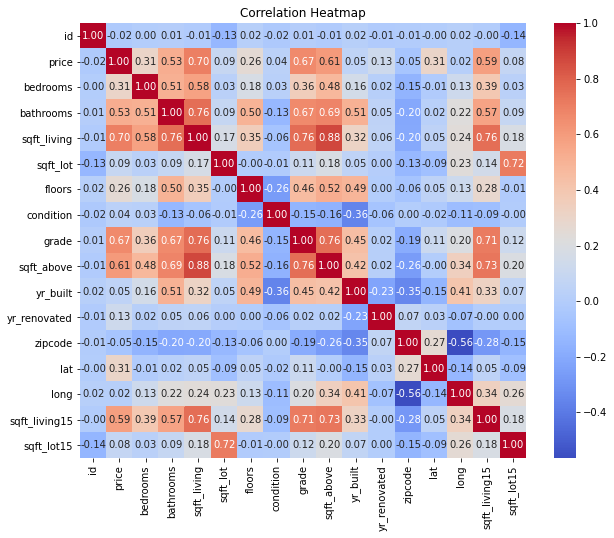

In [76]:
# Plot the heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


Correlation coeffiencts are used to assess the strength of associations between two variables.
In this case, we want to determing the strength of price with reference to the other factors.

In [75]:
#determining the correlation coefficient of the price column

# Calculate the entire correlation matrix
correlation_matrix = df.corr()

# Extract the correlation of 'price' with all other columns
price_correlation = correlation_matrix["price"].sort_values(ascending=False)

# Print the correlation of 'price' with other columns
print(price_correlation)


price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
bedrooms         0.308787
lat              0.306692
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64


The above output shows the corelation of price to the other factors sorted in descending order.

 - The sqft_living shows the highest correlation  of 0.701919 to price
 - The zipcode shows the lowerst correlation of -0.053402


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define features and target
X = df[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']]
y = df['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 60722254811.73449


In [58]:
# #plot the frequency of the columns
# df.hist(figsize=(30,20))
# plt.show()

c:\Users\AHB\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, "'Boxplot 'Waterfront' vs 'Price'")

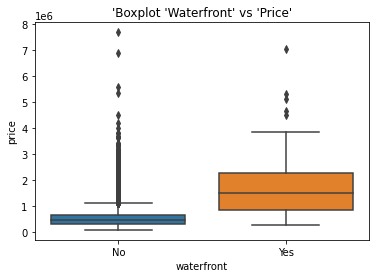

In [78]:
#determine if houses with waterfront have any effect to price.
sns.boxplot(df['waterfront'], df['price'])
plt.title("'Boxplot 'Waterfront' vs 'Price'")

Houses with waterfront tend to have a higher median price compared to those without waterfront. This suggests that being on the waterfront adds significant value to a property

### Derterminig if the sqft living is positively or negatively correalted to price

c:\Users\AHB\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Regression Plot')

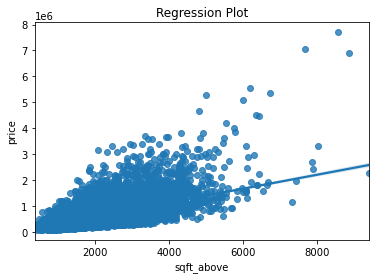

In [79]:
sns.regplot(df['sqft_above'], df['price'])
plt.title("Regression Plot")

c:\Users\AHB\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Regression Plot')

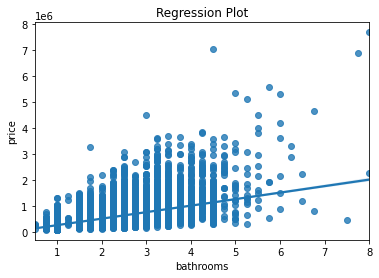

In [80]:
sns.regplot(df['bathrooms'], df['price'])
plt.title("Regression Plot")

From the output produced, we  can conclude that the sqft_above has a postive correlation to price.